<a href="https://colab.research.google.com/github/dylnhoang/Projects/blob/main/PredictingVOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing PyCaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 95.3 MB/s eta 0:00:00
   ━━━━━

In [ ]:
# Importing the libraries
import pandas as pd
from pycaret.regression import *

#Loading VOO dataset
data = pd.read_csv('VOO.csv')

#Preprocessing the data
data['Date'] = pd.to_datetime(data['Date']) #Converts the date column to a datetime data type
data.set_index('Date', inplace=True) #Set the Date to be the index

#Splitting date into year, month, day, and day of week columns
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Day of Week'] = data.index.dayofweek

data['Next Close'] = data['Close'].shift(1) #Defining the target vaariable as tomorrow's close price
data.dropna(inplace=True) #Dropping NA values

#Data Table
data

#Splitting data
train = data[data.index < '2022-01-01'] #Define the training data
test = data[data.index >= '2022-01-01'] #Define the test data

#Initialization of PyCaret regression environment
reg = setup(data = train, target = 'Next Close', session_id=123, use_gpu = False)

#Comparing models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Next Close
2,Target type,Regression
3,Original data shape,"(455, 10)"
4,Transformed data shape,"(455, 10)"
5,Transformed train set shape,"(318, 10)"
6,Transformed test set shape,"(137, 10)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.0078,17.3405,4.0957,0.9943,0.0136,0.0093,0.0510
knn,K Neighbors Regressor,3.2459,19.7494,4.4014,0.9937,0.0146,0.0100,0.0600
par,Passive Aggressive Regressor,3.5172,21.6122,4.6130,0.9930,0.0150,0.0108,0.0840
en,Elastic Net,12.3378,211.3537,14.4622,0.9313,0.0461,0.0378,0.0530
et,Extra Trees Regressor,15.1435,312.8295,17.5059,0.8998,0.0553,0.0464,0.1890
lasso,Lasso Regression,25.2180,862.5815,29.2502,0.7206,0.0911,0.0774,0.0550
llar,Lasso Least Angle Regression,25.9989,916.5946,30.1537,0.7031,0.0938,0.0798,0.0530
huber,Huber Regressor,34.2808,1633.5155,39.7566,0.4734,0.1222,0.1053,0.1270
ada,AdaBoost Regressor,33.4218,1815.3914,41.9527,0.4261,0.1322,0.1068,0.1370
rf,Random Forest Regressor,35.6871,1882.7511,42.9953,0.4023,0.1344,0.1130,0.2810


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best_model

OrthogonalMatchingPursuit()

In [ ]:
finalized_model = finalize_model(best_model)

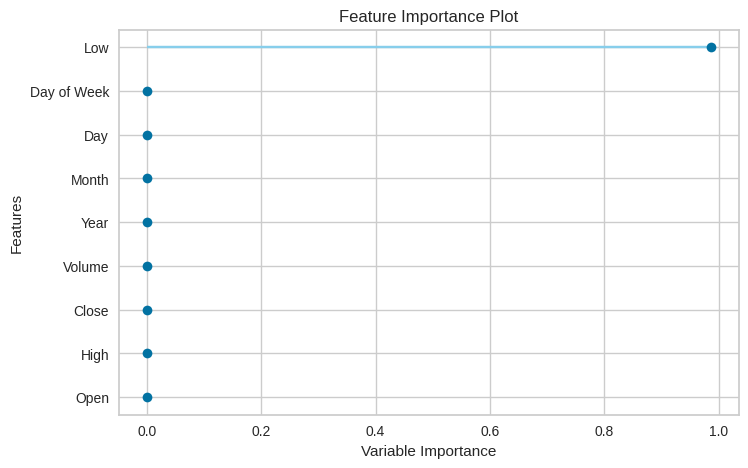

In [ ]:
#Plotting feature importance
plot_model(finalized_model, plot = 'feature')

In [ ]:
# Show the model and statistical evaluation metrics
predictions = predict_model(finalized_model, data=test)

#Show predictions
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,3.9804,26.4052,5.1386,0.9939,0.0124,0.0095


,Open,High,Low,Close,Volume,Year,Month,Day,Day of Week,Next Close,prediction_label
Date,,,,,,,,,,,
2025-03-13,513.510010,514.059998,505.420013,507.049988,"21,650,000",2025,3,13,3,517.460022,505.935227
2025-03-12,516.890015,517.739990,509.100006,513.760010,"8,590,555",2025,3,12,2,507.049988,509.564090
2025-03-11,514.330017,517.530029,507.529999,511.279999,"11,208,910",2025,3,11,1,513.760010,508.015897
2025-03-10,521.900024,523.700012,510.829987,515.510010,"11,176,890",2025,3,10,0,511.279999,511.270035
2025-03-07,524.900024,530.880005,520.130005,529.510010,"7,308,280",2025,3,7,4,515.510010,520.440840
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,430.209991,431.359985,427.200012,428.589996,"6,157,536",2022,1,7,4,428.029999,428.802004
2022-01-06,430.200012,432.829987,427.899994,430.079987,"7,971,547",2022,1,6,3,428.589996,429.492261
2022-01-05,438.779999,439.410004,430.529999,430.660004,"7,539,607",2022,1,5,2,430.079987,432.085724


In [ ]:
#Evaluate the model and show the predictions on the entire data set
predictions = predict_model(finalized_model, data = test)
print(predictions[['Year', 'Month', 'Day', 'Next Close', 'prediction_label']])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,3.9804,26.4052,5.1386,0.9939,0.0124,0.0095


            Year  Month  Day  Next Close  prediction_label
Date                                                      
2025-03-13  2025      3   13  517.460022        505.935227
2025-03-12  2025      3   12  507.049988        509.564090
2025-03-11  2025      3   11  513.760010        508.015897
2025-03-10  2025      3   10  511.279999        511.270035
2025-03-07  2025      3    7  515.510010        520.440840
...          ...    ...  ...         ...               ...
2022-01-07  2022      1    7  428.029999        428.802004
2022-01-06  2022      1    6  428.589996        429.492261
2022-01-05  2022      1    5  430.079987        432.085724
2022-01-04  2022      1    4  430.660004        438.682777
2022-01-03  2022      1    3  439.070007        437.124742

[801 rows x 5 columns]
